In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Mall Customers Segmentation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("gdrive/My Drive/Praktisi Mengajar/Universitas Negeri Surabaya/Data Mining/10. Clustering/Code/data/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

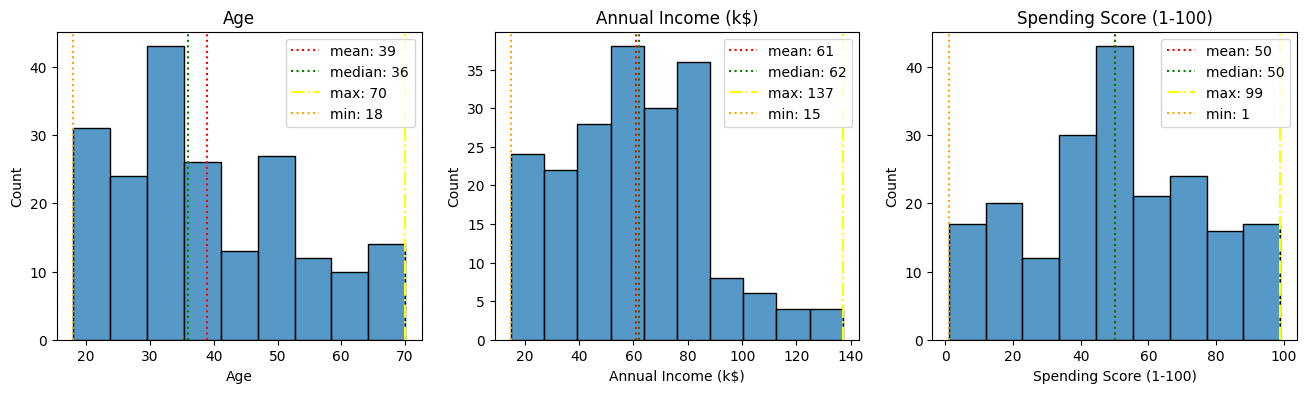

In [6]:
plt.figure(figsize=(16,4))
i = 131
col_to_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for col in (col_to_plot):
    plt.subplot(i)
    data = df[col]
    plt.title(f'{col}')
    sns.histplot(data)
    mean = int(round(data.mean()))
    median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
    maxi = int(round(data.max()))
    mini = int(round(data.min()))
    plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
    plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
    plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
    plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
    plt.legend(loc='best')
    i += 1

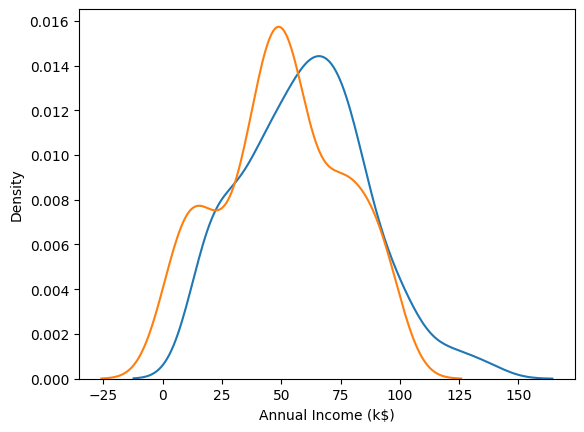

In [7]:
sns.kdeplot(df['Annual Income (k$)'])
sns.kdeplot(df['Spending Score (1-100)'])
plt.show()

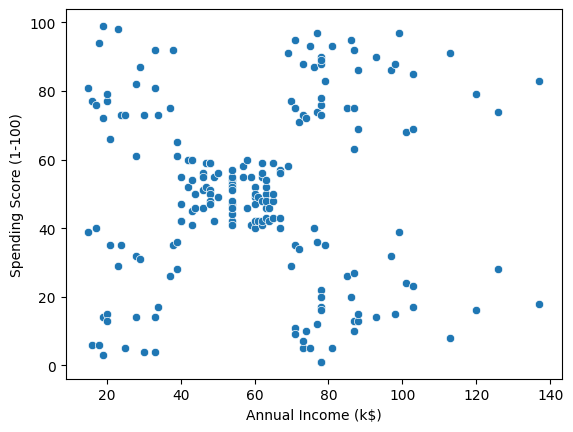

In [8]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()

In [9]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

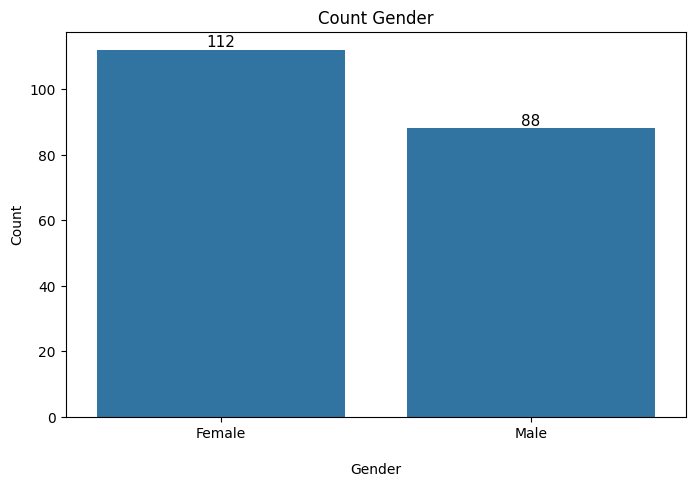

In [10]:
df_plot = df.copy(deep=True)
a = []
b = df_plot.columns.tolist()
for i in df_plot['Gender'].value_counts().index.tolist():
    a.extend(df_plot[df_plot['Gender']==i].values)

df_con = pd.DataFrame(columns=b, data=a)

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Gender', data=df_con)
plt.title('Count Gender')
plt.xlabel('\nGender')
plt.ylabel('Count')
# plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+1), ha="center", fontsize=11)

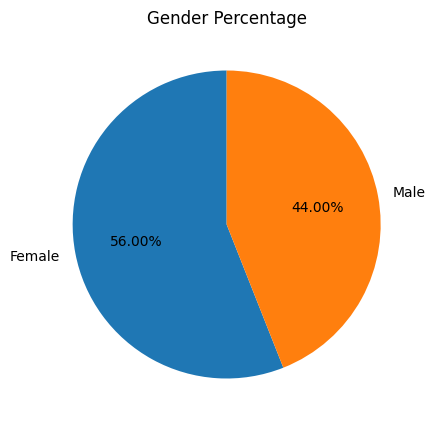

In [11]:
fig = plt.figure(figsize=(10,5))
# fig.patch.set_facecolor('xkcd:white')
plt.title('Gender Percentage')
sizes = df['Gender'].value_counts().values.tolist()
labels = df['Gender'].value_counts().index.tolist()

plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.show()

<Axes: >

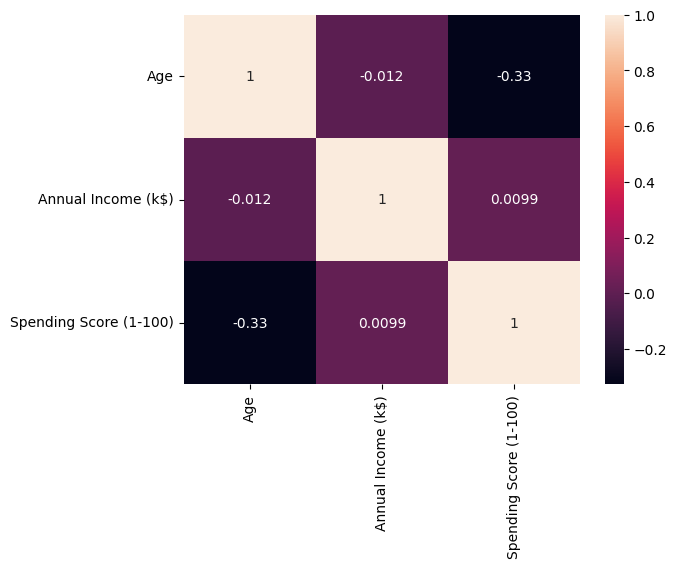

In [12]:
sns.heatmap(df.drop(['CustomerID','Gender'],axis=1).corr(), annot=True)

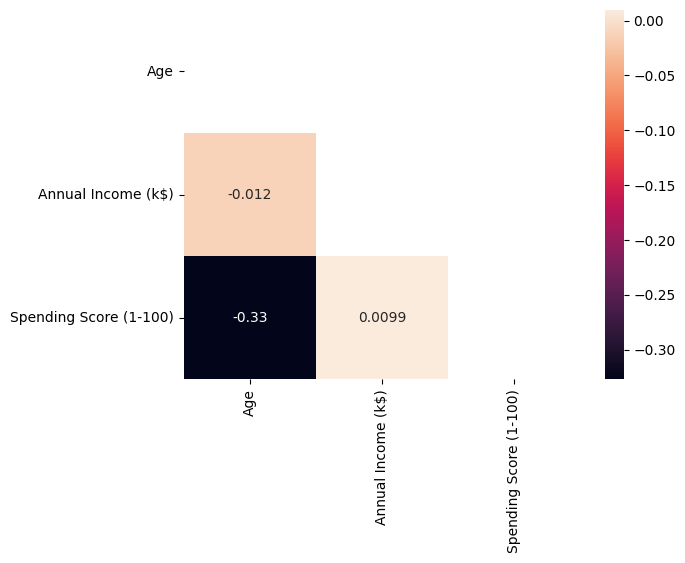

In [13]:
data = df.drop(['CustomerID','Gender'],axis=1)
ut = np.triu(data.corr())
# lt = np.tril(data.corr())
sns.heatmap(data.corr(), annot=True, cbar='True', mask=ut)
plt.show()

# Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
df2 = df.copy(deep=True)
df2['Annual Income (k$)_2'] = MinMaxScaler().fit_transform(df2[['Annual Income (k$)']])
df2['Spending Score (1-100)_2'] = MinMaxScaler().fit_transform(df2[['Spending Score (1-100)']])
df2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_2,Spending Score (1-100)_2
0,1,Male,19,15,39,0.000000,0.387755
1,2,Male,21,15,81,0.000000,0.816327
2,3,Female,20,16,6,0.008197,0.051020
3,4,Female,23,16,77,0.008197,0.775510
4,5,Female,31,17,40,0.016393,0.397959
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.860656,0.795918
196,197,Female,45,126,28,0.909836,0.275510
197,198,Male,32,126,74,0.909836,0.744898
198,199,Male,32,137,18,1.000000,0.173469


In [16]:
print(df2['Annual Income (k$)_2'].min())
print(df2['Annual Income (k$)_2'].max())
print(df2['Spending Score (1-100)_2'].min())
print(df2['Spending Score (1-100)_2'].max())

0.0
1.0
0.0
0.9999999999999999


# Partioning Clustering (K-Means)

In [17]:
from sklearn.cluster import KMeans

## Elbow Method

In [18]:
k = range(1,16)
inertia = []

for i in k:
    km_model = KMeans(n_clusters=i) # jumlah cluster akan di looping
    km_model.fit(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']])
    inertia.append(km_model.inertia_)

print(list(k))
print(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[23.04072032603991, 13.993505283127973, 9.058985215159453, 6.110312266413656, 3.5831179059525606, 3.1006663776847883, 2.624103948396722, 2.2344196213747898, 1.9840116756618373, 1.6443560585499561, 1.450747355036956, 1.3048962483176378, 1.1735955058406036, 1.0536486970325154, 0.9594552487885728]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


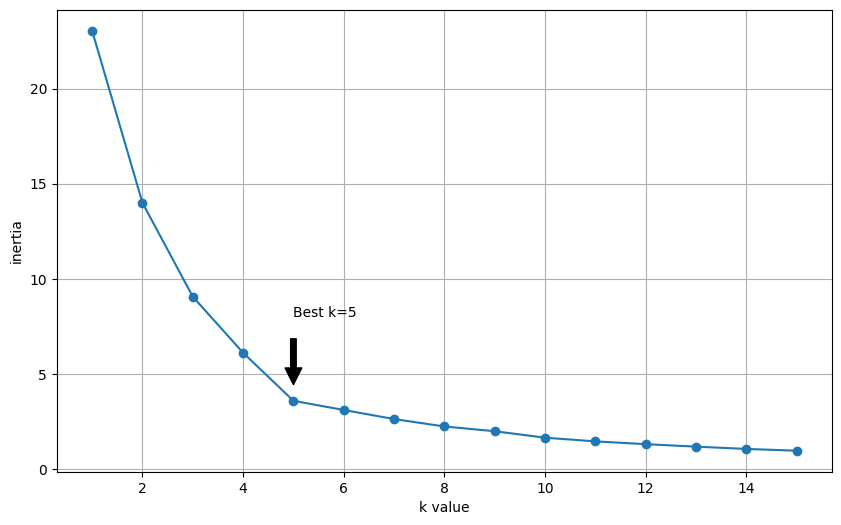

In [19]:
plt.figure(figsize=(10,6))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.annotate(
    'Best k=5', xy = (k[4], inertia[4]),
    xytext = (5, 8), arrowprops = dict(facecolor='black', shrink=0.2)
)
plt.grid()
plt.show()

## Clustering

In [20]:
kn5 = KMeans(n_clusters=5, random_state=1)
kn5

KMeans(n_clusters=5, random_state=1)

In [21]:
kn5.fit(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

In [62]:
kn5.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [22]:
df['Cluster_KM'] = kn5.predict(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']])
df2['Cluster_KM'] = kn5.predict(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']])
display(df)
display(df2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KM
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_2,Spending Score (1-100)_2,Cluster_KM
0,1,Male,19,15,39,0.000000,0.387755,4
1,2,Male,21,15,81,0.000000,0.816327,3
2,3,Female,20,16,6,0.008197,0.051020,4
3,4,Female,23,16,77,0.008197,0.775510,3
4,5,Female,31,17,40,0.016393,0.397959,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.860656,0.795918,2
196,197,Female,45,126,28,0.909836,0.275510,1
197,198,Male,32,126,74,0.909836,0.744898,2
198,199,Male,32,137,18,1.000000,0.173469,1


In [63]:
from sklearn import metrics
labels = kn5.labels_
metrics.silhouette_score(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']], labels, metric='euclidean')

0.5594854531227246

In [64]:
df2[['Annual Income (k$)','Spending Score (1-100)']].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [65]:
kn5_b = KMeans(n_clusters=5, random_state=1)
kn5_b.fit(df2[['Annual Income (k$)','Spending Score (1-100)']])
kn5_b.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [66]:
from sklearn import metrics
labels = kn5_b.labels_
metrics.silhouette_score(df2[['Annual Income (k$)','Spending Score (1-100)']], labels, metric='euclidean')

0.553931997444648

In [ ]:
# 0.5594854531227246 # artinya kmeans lebih bagus jika memetakan dengan nilai scaled

## Visualization

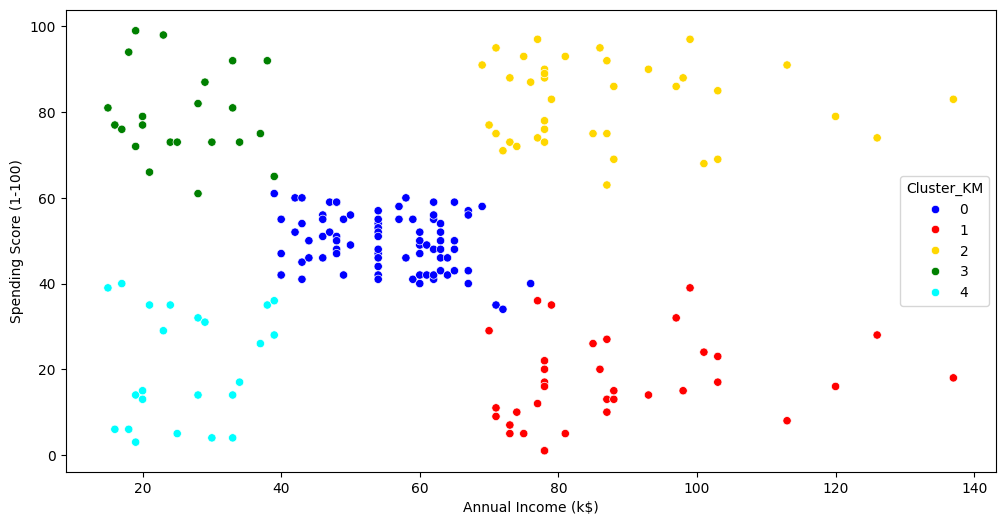

In [23]:
plt.figure(figsize=(12,6))
palette = ['blue','red','gold','green','cyan']
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KM', data=df, palette=palette)
plt.show()

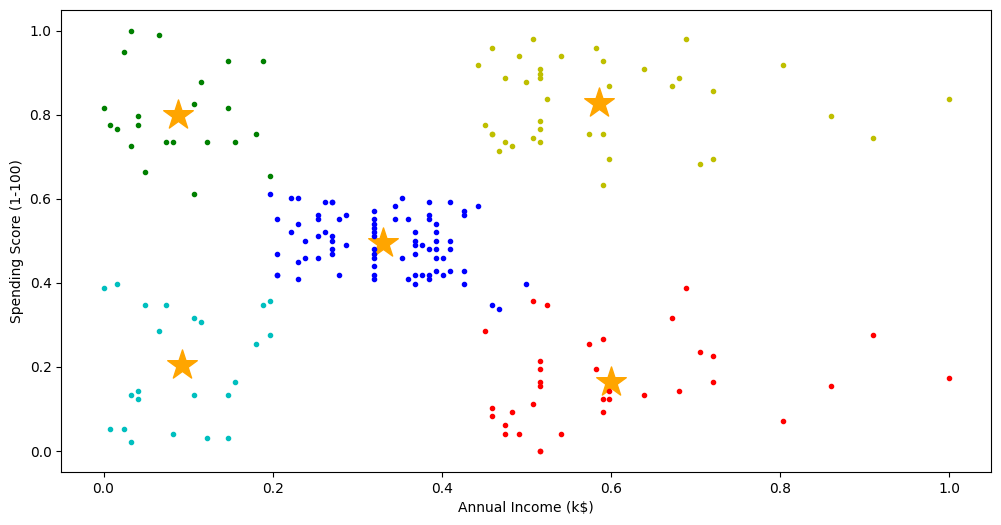

In [24]:
plt.figure(figsize=(12,6))
plt.scatter(
    kn5.cluster_centers_[:,0],
    kn5.cluster_centers_[:,1],
    color='orange', marker='*', s=500
)
plt.plot(df2['Annual Income (k$)_2'][df2['Cluster_KM']==0].values, df2['Spending Score (1-100)_2'][df2['Cluster_KM']==0].values, 'b.')
plt.plot(df2['Annual Income (k$)_2'][df2['Cluster_KM']==1].values, df2['Spending Score (1-100)_2'][df2['Cluster_KM']==1].values, 'r.')
plt.plot(df2['Annual Income (k$)_2'][df2['Cluster_KM']==2].values, df2['Spending Score (1-100)_2'][df2['Cluster_KM']==2].values, 'y.')
plt.plot(df2['Annual Income (k$)_2'][df2['Cluster_KM']==3].values, df2['Spending Score (1-100)_2'][df2['Cluster_KM']==3].values, 'g.')
plt.plot(df2['Annual Income (k$)_2'][df2['Cluster_KM']==4].values, df2['Spending Score (1-100)_2'][df2['Cluster_KM']==4].values, 'c.')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

<ipython-input-25-ca1cd74e550a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KM', y='Age', data=df, palette=palette)
<ipython-input-25-ca1cd74e550a>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(x='Cluster_KM', y='Age', hue='Gender', data=df, palette=palette)


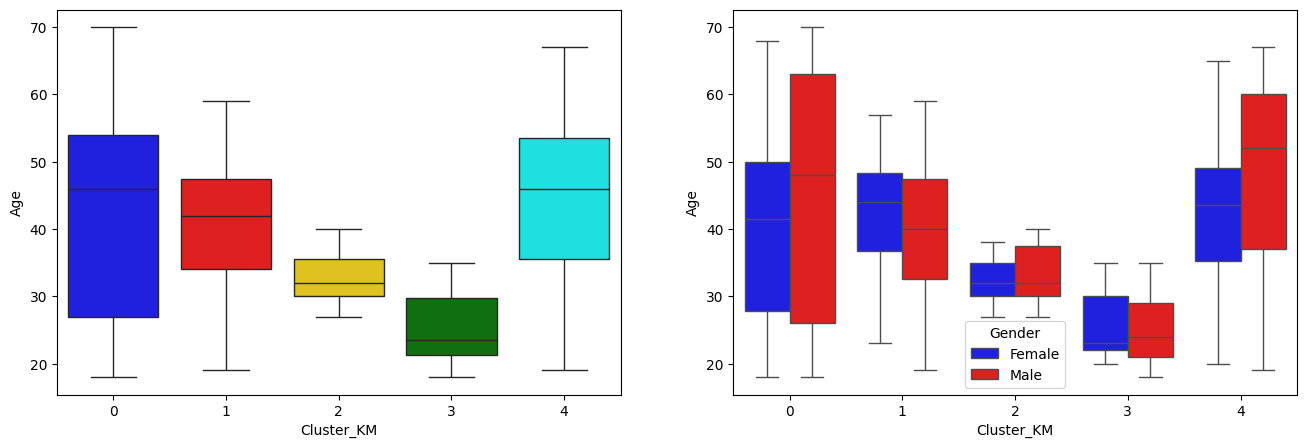

In [25]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_KM', y='Age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_KM', y='Age', hue='Gender', data=df, palette=palette)

plt.show()

<ipython-input-26-def5e6d8fe6d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KM', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)
<ipython-input-26-def5e6d8fe6d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_KM', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)


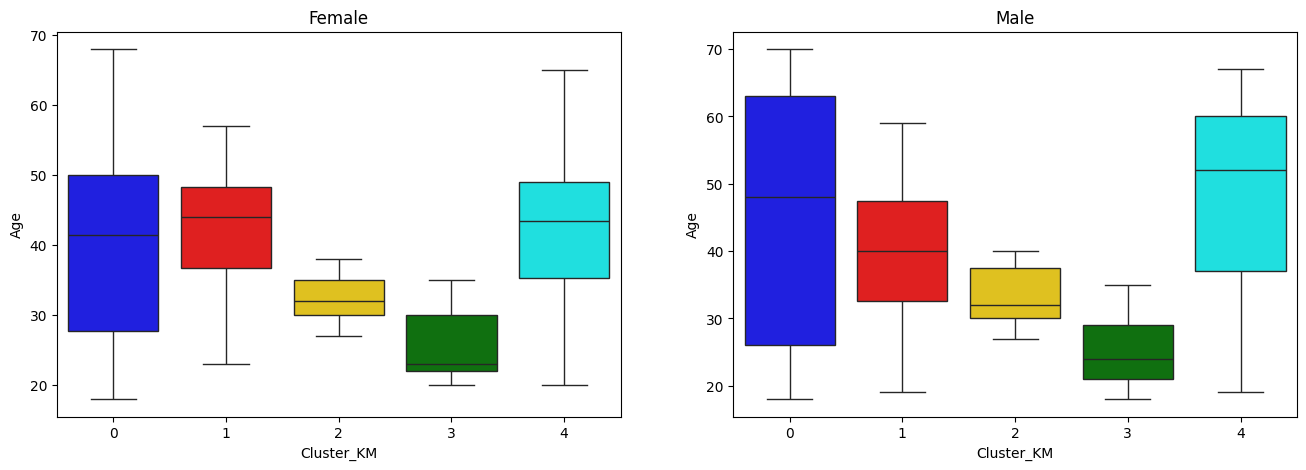

In [26]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Female')
sns.boxplot(x='Cluster_KM', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

plt.subplot(122)
plt.title('Male')
sns.boxplot(x='Cluster_KM', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

plt.show()

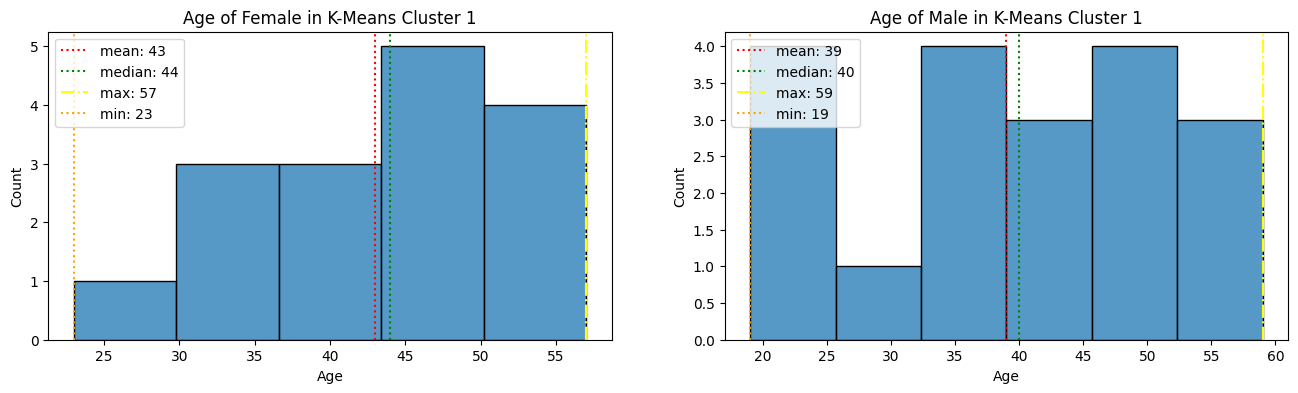

In [27]:
plt.figure(figsize=(16,4))
i = 121
col_to_plot = ['Female','Male']
no_cluster = 1  # ada pilihan cluster (0,1,2,3,4)
for col in (col_to_plot):
  plt.subplot(i)
  # data = df[col]
  data = df[(df['Cluster_KM']==no_cluster) & (df['Gender']==col)]['Age']
  plt.title(f'Age of {col} in K-Means Cluster {no_cluster}')
  sns.histplot(data)
  mean = int(round(data.mean()))
  median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
  maxi = int(round(data.max()))
  mini = int(round(data.min()))
  plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
  plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
  plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
  plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
  plt.legend(loc='best')
  i += 1

# Hierarchical Clustering (Linkage)

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

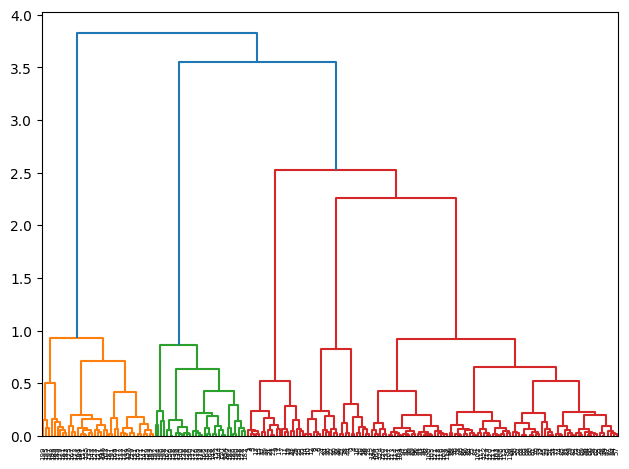

In [29]:
linkage_data = linkage(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']], method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']])

pred_agc = pd.Series(hierarchical_cluster.labels_)
df2['Cluster_HA'] = pred_agc; df['Cluster_HA'] = pred_agc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [31]:
display(df)
display(df2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KM,Cluster_HA
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,3,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,3,3
4,5,Female,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0
196,197,Female,45,126,28,1,2
197,198,Male,32,126,74,2,0
198,199,Male,32,137,18,1,2


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_2,Spending Score (1-100)_2,Cluster_KM,Cluster_HA
0,1,Male,19,15,39,0.000000,0.387755,4,4
1,2,Male,21,15,81,0.000000,0.816327,3,3
2,3,Female,20,16,6,0.008197,0.051020,4,4
3,4,Female,23,16,77,0.008197,0.775510,3,3
4,5,Female,31,17,40,0.016393,0.397959,4,4
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.860656,0.795918,2,0
196,197,Female,45,126,28,0.909836,0.275510,1,2
197,198,Male,32,126,74,0.909836,0.744898,2,0
198,199,Male,32,137,18,1.000000,0.173469,1,2


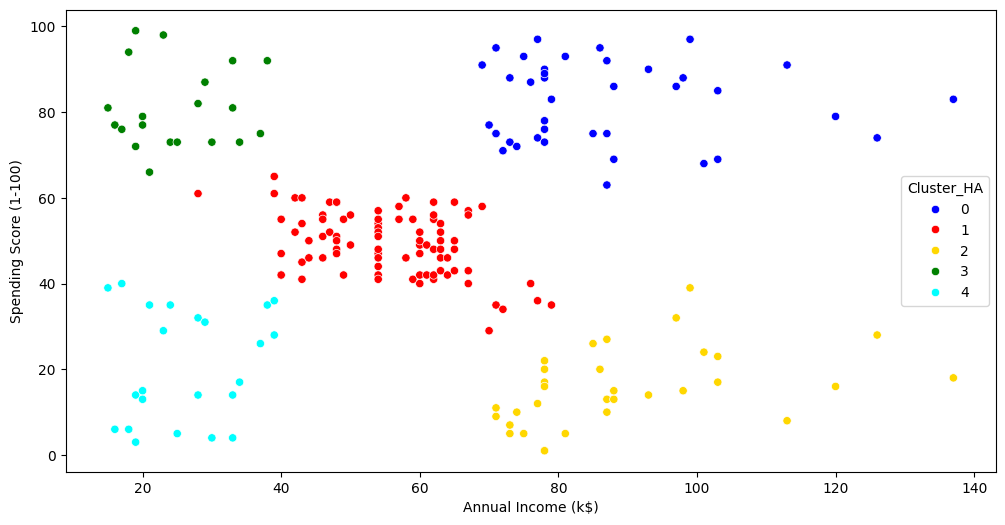

In [32]:
plt.figure(figsize=(12,6))
palette = ['blue','red','gold','green','cyan']
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_HA', data=df, palette=palette)
plt.show()

<ipython-input-33-b13356a11ddc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_HA', y='Age', data=df, palette=palette)
<ipython-input-33-b13356a11ddc>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(x='Cluster_HA', y='Age', hue='Gender', data=df, palette=palette)


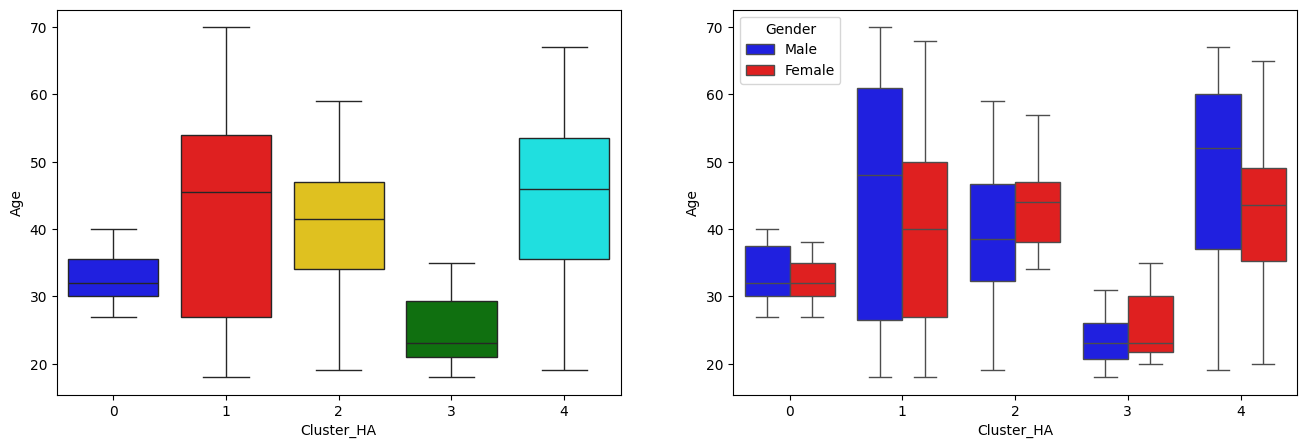

In [33]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_HA', y='Age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_HA', y='Age', hue='Gender', data=df, palette=palette)

plt.show()

<ipython-input-34-94192b1fd127>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_HA', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)
<ipython-input-34-94192b1fd127>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_HA', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)


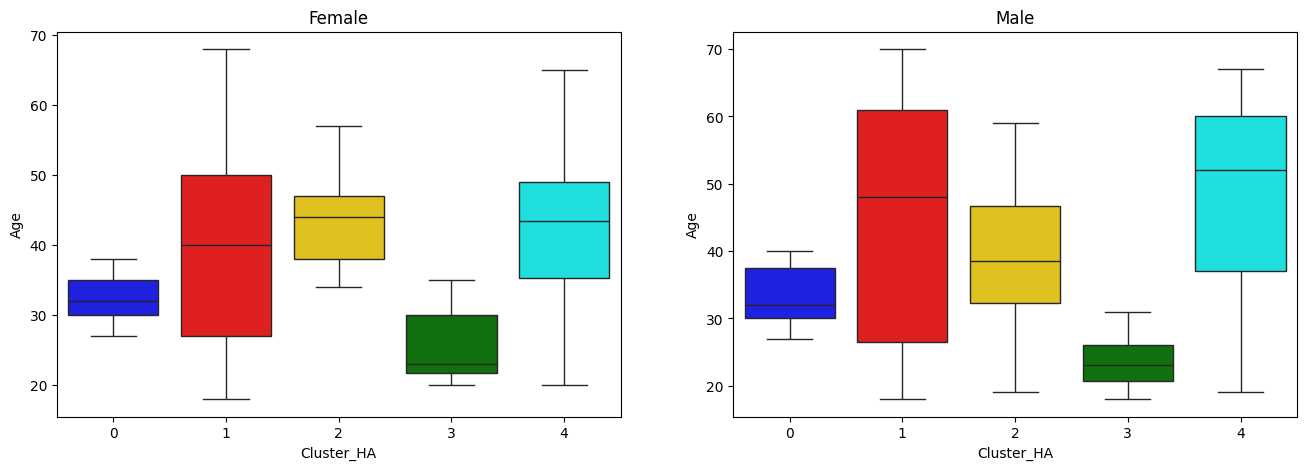

In [34]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Female')
sns.boxplot(x='Cluster_HA', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

plt.subplot(122)
plt.title('Male')
sns.boxplot(x='Cluster_HA', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

plt.show()

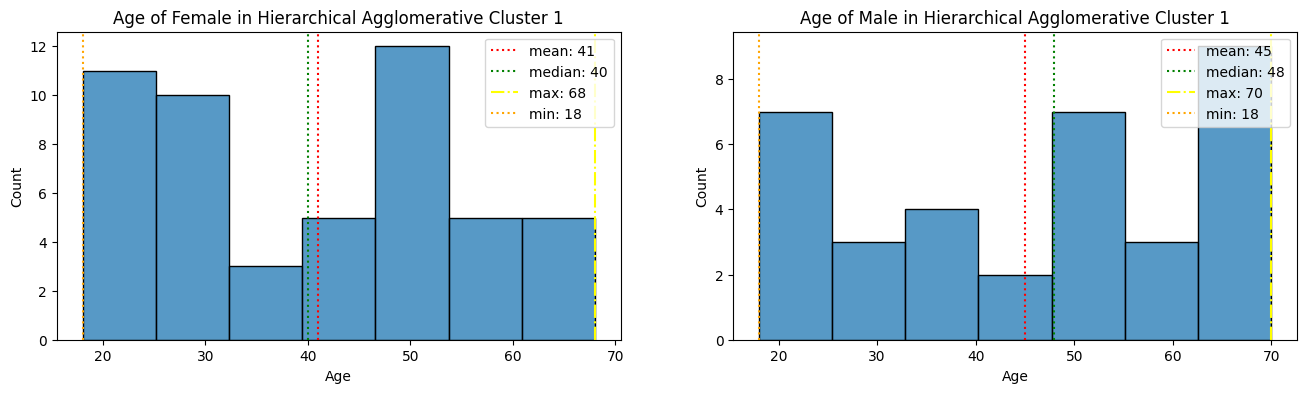

In [35]:
plt.figure(figsize=(16,4))
i = 121
col_to_plot = ['Female','Male']
no_cluster = 1
for col in (col_to_plot):
  plt.subplot(i)
  # data = df[col]
  data = df[(df['Cluster_HA']==no_cluster) & (df['Gender']==col)]['Age']
  plt.title(f'Age of {col} in Hierarchical Agglomerative Cluster {no_cluster}')
  sns.histplot(data)
  mean = int(round(data.mean()))
  median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
  maxi = int(round(data.max()))
  mini = int(round(data.min()))
  plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
  plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
  plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
  plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
  plt.legend(loc='best')
  i += 1

# DBSCAN Clustering (Linkage)

In [36]:
from sklearn.cluster import DBSCAN

In [37]:
db_model = DBSCAN(eps = 0.1, min_samples = 10).fit(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']])
db_model

DBSCAN(eps=0.1, min_samples=10)

In [38]:
labels = db_model.labels_
print('Cluster yang terbentuk: ', pd.unique(labels))
print(labels)

Cluster yang terbentuk:  [-1  0  1  2  3]
[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1  0 -1 -1 -1  0 -1  0
 -1  0 -1  1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  2  1  2  1  2  3  2  3  2  1  2  3  2  3  2  3  2  3  2  1  2
  3  2  1  2  3  2  3  2  3  2  3  2  3  2  3  2  1  2  3  2  3  2  3  2
  3 -1  3  2  3  2  3  2  3  2  3  2 -1  2  3  2 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [39]:
df['Cluster_DB'] = labels
df2['Cluster_DB'] = labels
display(df)
display(df2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KM,Cluster_HA,Cluster_DB
0,1,Male,19,15,39,4,4,-1
1,2,Male,21,15,81,3,3,0
2,3,Female,20,16,6,4,4,-1
3,4,Female,23,16,77,3,3,0
4,5,Female,31,17,40,4,4,-1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0,-1
196,197,Female,45,126,28,1,2,-1
197,198,Male,32,126,74,2,0,-1
198,199,Male,32,137,18,1,2,-1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_2,Spending Score (1-100)_2,Cluster_KM,Cluster_HA,Cluster_DB
0,1,Male,19,15,39,0.000000,0.387755,4,4,-1
1,2,Male,21,15,81,0.000000,0.816327,3,3,0
2,3,Female,20,16,6,0.008197,0.051020,4,4,-1
3,4,Female,23,16,77,0.008197,0.775510,3,3,0
4,5,Female,31,17,40,0.016393,0.397959,4,4,-1
...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.860656,0.795918,2,0,-1
196,197,Female,45,126,28,0.909836,0.275510,1,2,-1
197,198,Male,32,126,74,0.909836,0.744898,2,0,-1
198,199,Male,32,137,18,1.000000,0.173469,1,2,-1


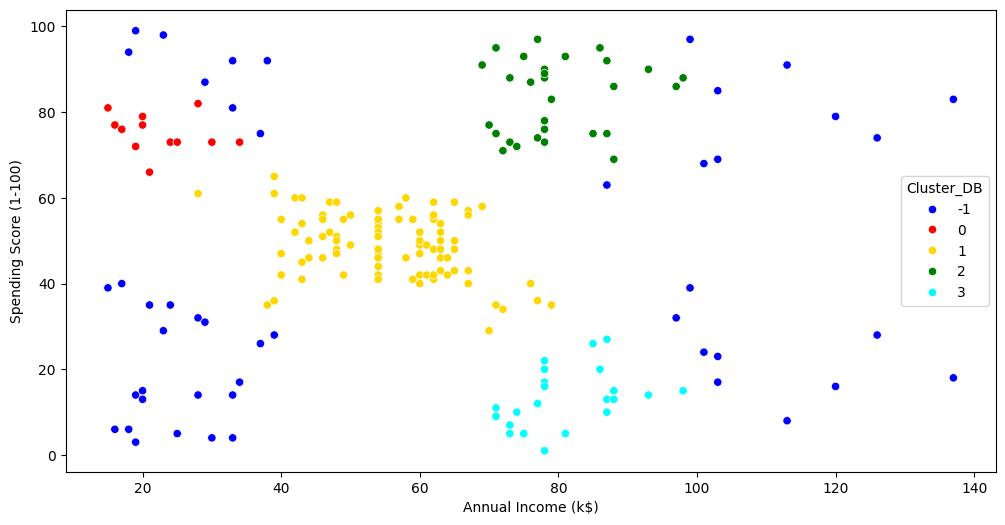

In [40]:
plt.figure(figsize=(12,6))
palette = ['blue','red','gold','green','cyan']
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_DB', data=df, palette=palette)
plt.show()

<ipython-input-41-4b6d8f6574b9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_DB', y='Age', data=df, palette=palette)
<ipython-input-41-4b6d8f6574b9>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.boxplot(x='Cluster_DB', y='Age', hue='Gender', data=df, palette=palette)


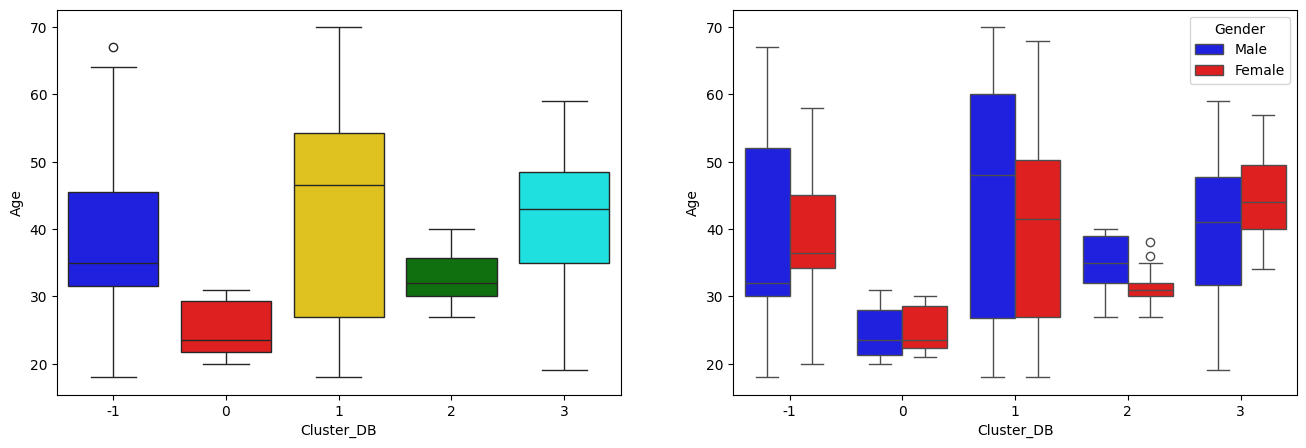

In [41]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_DB', y='Age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_DB', y='Age', hue='Gender', data=df, palette=palette)

plt.show()

<ipython-input-42-a6857b8e4484>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_DB', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)
<ipython-input-42-a6857b8e4484>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_DB', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)


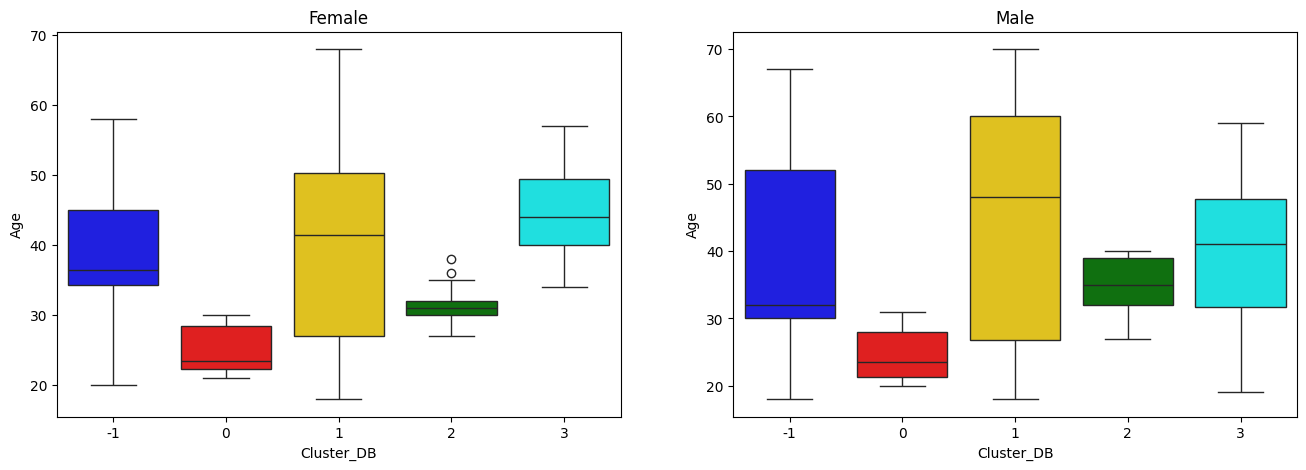

In [42]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Female')
sns.boxplot(x='Cluster_DB', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

plt.subplot(122)
plt.title('Male')
sns.boxplot(x='Cluster_DB', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

plt.show()

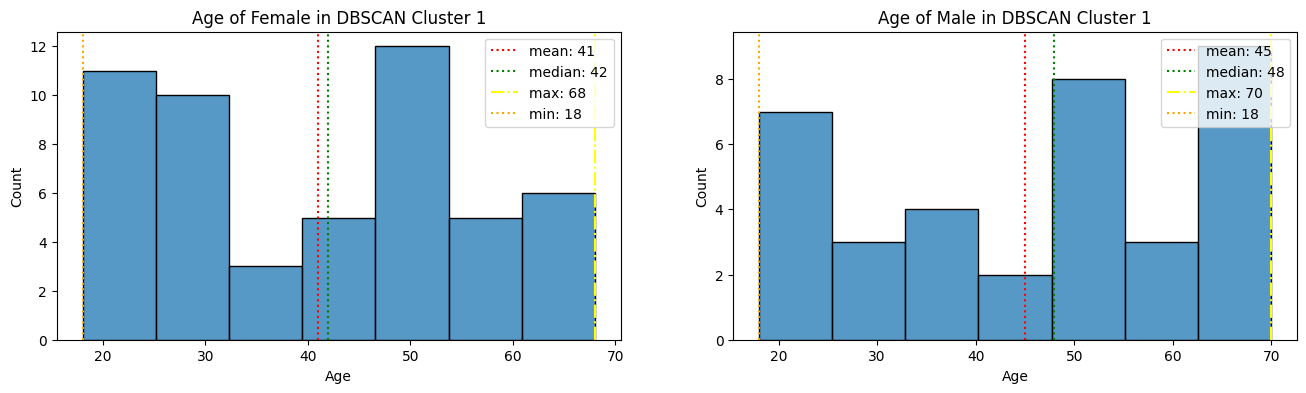

In [43]:
plt.figure(figsize=(16,4))
i = 121
col_to_plot = ['Female','Male']
no_cluster = 1
for col in (col_to_plot):
  plt.subplot(i)
  # data = df[col]
  data = df[(df['Cluster_DB']==no_cluster) & (df['Gender']==col)]['Age']
  plt.title(f'Age of {col} in DBSCAN Cluster {no_cluster}')
  sns.histplot(data)
  mean = int(round(data.mean()))
  median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
  maxi = int(round(data.max()))
  mini = int(round(data.min()))
  plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
  plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
  plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
  plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
  plt.legend(loc='best')
  i += 1

# Grid-Based Clustering (Linkage)

In [44]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=32d569268ee9b4e04e9d5009df9b6d08f4b438ecbe6107304229f120a8a66cef
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [45]:
from pyclustering.cluster.clique import clique # Select clustering method: clique class
from pyclustering.cluster.clique import clique_visualizer # clique visualization

In [46]:
# Create CLIQUE algorithm for processing
intervals = 5  # Define the number of grid cells in each dimension
threshold = 10 # Density threshold
clique_instance = clique(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']].values, intervals, threshold)

In [47]:
# Start the clustering process and get the results
clique_instance.process()
clique_cluster = clique_instance.get_clusters()  # allocated clusters

In [48]:
# Points considered as outliers (noise points)
noise = clique_instance.get_noise()
# CLIQUE formed grid unit
cells = clique_instance.get_cells()

In [49]:
print("Amount of clusters:", len(clique_cluster))
print(clique_cluster)

Amount of clusters: 5
[[2, 6, 8, 10, 12, 14, 22, 24, 30, 32, 34, 36, 0, 4, 16, 18, 20, 26, 28, 38, 40, 42, 44], [128, 130, 134, 136, 138, 140, 144, 150, 152, 154, 156, 158, 162, 166, 170, 172, 174, 176], [46, 47, 48, 49, 50, 52, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111], [3, 5, 9, 13, 15, 17, 21, 23, 27, 31, 37, 39, 43, 45], [125, 129, 131, 133, 137, 139, 147, 153, 157, 159, 165, 169, 171, 177, 123, 127, 135, 141, 143, 145, 149, 151, 155, 161, 163, 167, 173, 175]]


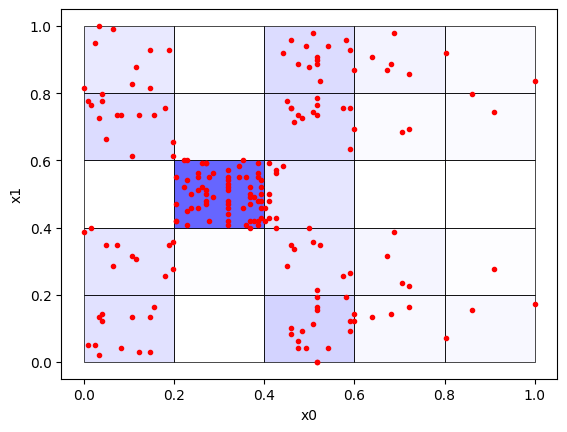

In [50]:
# Display the grid formed by the algorithm
clique_visualizer.show_grid(cells, df2[['Annual Income (k$)_2','Spending Score (1-100)_2']].values)

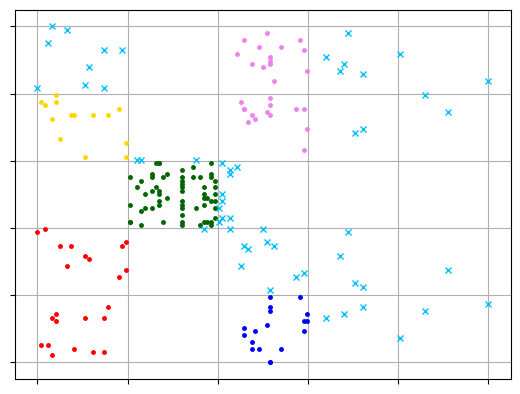

In [51]:
# Display clustering results
clique_visualizer.show_clusters(df2[['Annual Income (k$)_2','Spending Score (1-100)_2']].values, clique_cluster, noise)  # show clustering results

In [52]:
print(len(df))
print(len(clique_cluster[0]) + len(clique_cluster[1]) + len(clique_cluster[2]) + len(clique_cluster[3]) + len(clique_cluster[4]) + len(noise))

200
200


In [53]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KM,Cluster_HA,Cluster_DB
0,1,Male,19,15,39,4,4,-1
1,2,Male,21,15,81,3,3,0
2,3,Female,20,16,6,4,4,-1
3,4,Female,23,16,77,3,3,0
4,5,Female,31,17,40,4,4,-1
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0,-1
196,197,Female,45,126,28,1,2,-1
197,198,Male,32,126,74,2,0,-1
198,199,Male,32,137,18,1,2,-1


In [54]:
df['Cluster_CL'] = -1  # Inisialisasi dengan -1 (noise)
df2['Cluster_CL'] = -1  # Inisialisasi dengan -1 (noise)

# Memetakan setiap sampel ke cluster yang sesuai
for cluster_id, cluster in enumerate(clique_cluster):
    for sample_id in cluster:
        df.loc[sample_id, "Cluster_CL"] = cluster_id
        df2.loc[sample_id, "Cluster_CL"] = cluster_id

# Menangani noise points
for noise_id in noise:
    df.loc[noise_id, "Cluster_CL"] = -1
    df2.loc[noise_id, "Cluster_CL"] = -1

In [55]:
display(df)
display(df2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_KM,Cluster_HA,Cluster_DB,Cluster_CL
0,1,Male,19,15,39,4,4,-1,0
1,2,Male,21,15,81,3,3,0,-1
2,3,Female,20,16,6,4,4,-1,0
3,4,Female,23,16,77,3,3,0,3
4,5,Female,31,17,40,4,4,-1,0
...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,0,-1,-1
196,197,Female,45,126,28,1,2,-1,-1
197,198,Male,32,126,74,2,0,-1,-1
198,199,Male,32,137,18,1,2,-1,-1


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_2,Spending Score (1-100)_2,Cluster_KM,Cluster_HA,Cluster_DB,Cluster_CL
0,1,Male,19,15,39,0.000000,0.387755,4,4,-1,0
1,2,Male,21,15,81,0.000000,0.816327,3,3,0,-1
2,3,Female,20,16,6,0.008197,0.051020,4,4,-1,0
3,4,Female,23,16,77,0.008197,0.775510,3,3,0,3
4,5,Female,31,17,40,0.016393,0.397959,4,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0.860656,0.795918,2,0,-1,-1
196,197,Female,45,126,28,0.909836,0.275510,1,2,-1,-1
197,198,Male,32,126,74,0.909836,0.744898,2,0,-1,-1
198,199,Male,32,137,18,1.000000,0.173469,1,2,-1,-1


In [56]:
display(df['Cluster_CL'].value_counts())
display(df2['Cluster_CL'].value_counts())

Cluster_CL
 2    62
-1    55
 4    28
 0    23
 1    18
 3    14
Name: count, dtype: int64

Cluster_CL
 2    62
-1    55
 4    28
 0    23
 1    18
 3    14
Name: count, dtype: int64

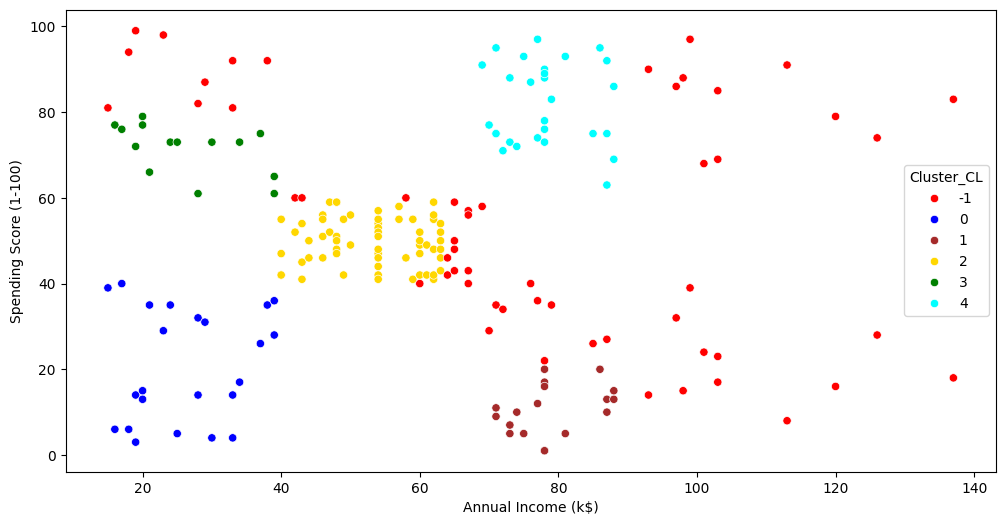

In [57]:
plt.figure(figsize=(12,6))
palette = ['red','blue','brown','gold','green','cyan']
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_CL', data=df, palette=palette)
plt.show()

<ipython-input-58-b63ca8d0e766>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_CL', y='Age', data=df, palette=palette)
<ipython-input-58-b63ca8d0e766>:7: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.boxplot(x='Cluster_CL', y='Age', hue='Gender', data=df, palette=palette)


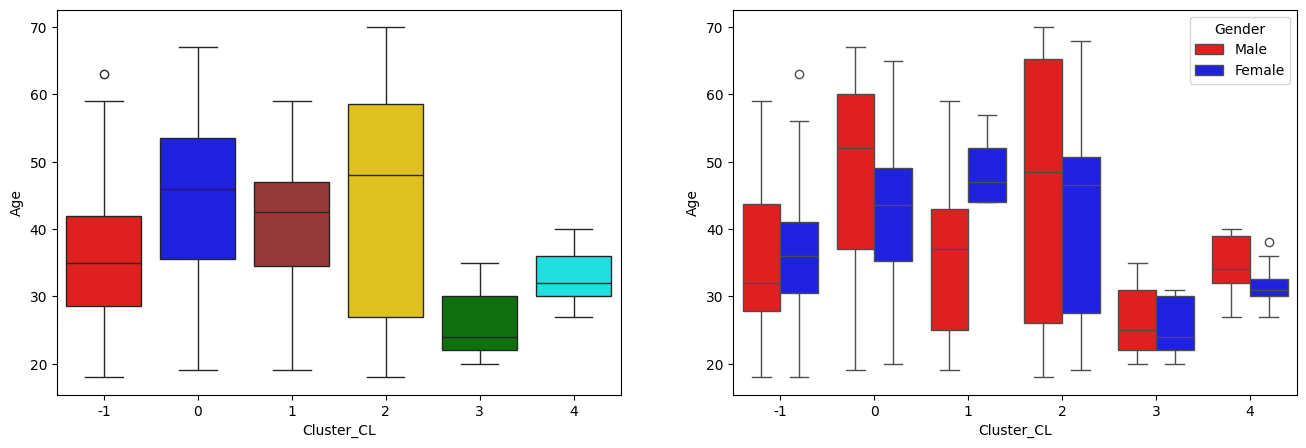

In [58]:
plt.figure(figsize=(16,5))

plt.subplot(121)
sns.boxplot(x='Cluster_CL', y='Age', data=df, palette=palette)

plt.subplot(122)
sns.boxplot(x='Cluster_CL', y='Age', hue='Gender', data=df, palette=palette)

plt.show()

<ipython-input-59-9d8549c21542>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_CL', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)
<ipython-input-59-9d8549c21542>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster_CL', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)


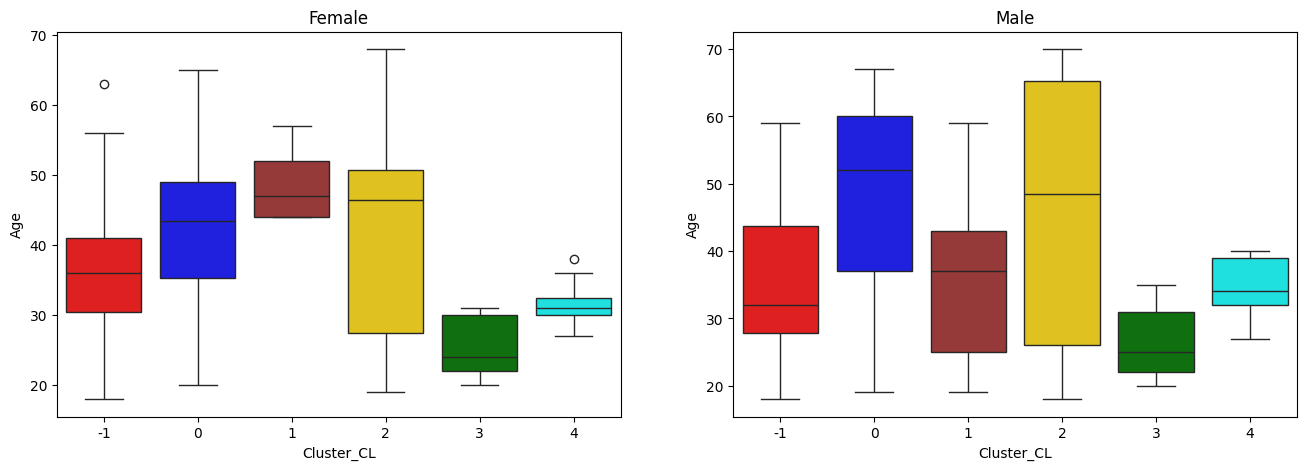

In [59]:
plt.figure(figsize=(16,5))

plt.subplot(121)
plt.title('Female')
sns.boxplot(x='Cluster_CL', y='Age', data=df[df['Gender']=='Female'].reset_index(drop=True), palette=palette)

plt.subplot(122)
plt.title('Male')
sns.boxplot(x='Cluster_CL', y='Age', data=df[df['Gender']=='Male'].reset_index(drop=True), palette=palette)

plt.show()

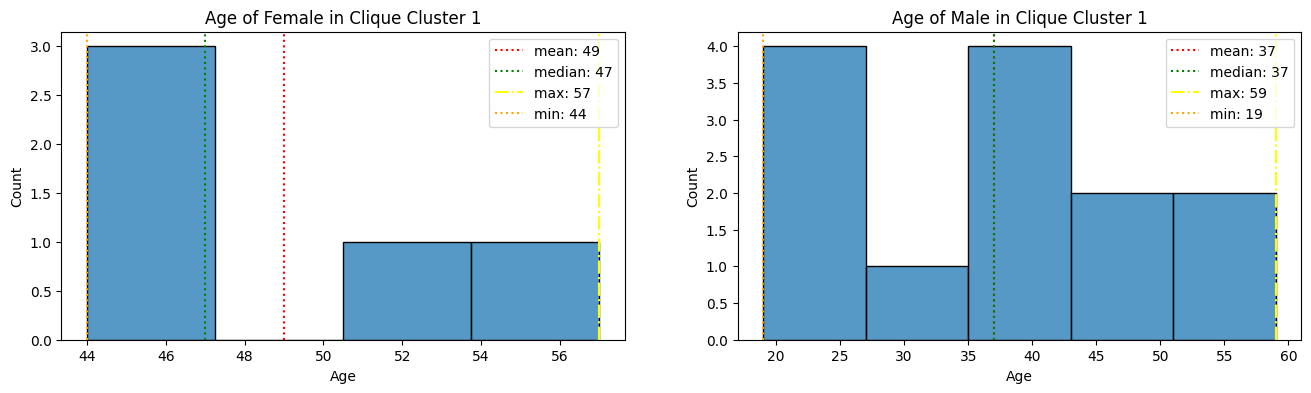

In [60]:
plt.figure(figsize=(16,4))
i = 121
col_to_plot = ['Female','Male']
no_cluster = 1
for col in (col_to_plot):
  plt.subplot(i)
  # data = df[col]
  data = df[(df['Cluster_CL']==no_cluster) & (df['Gender']==col)]['Age']
  plt.title(f'Age of {col} in Clique Cluster {no_cluster}')
  sns.histplot(data)
  mean = int(round(data.mean()))
  median = int(round(data.median()))
#     mode = round(int(data.mode()[0]))
  maxi = int(round(data.max()))
  mini = int(round(data.min()))
  plt.axvline(mean, color='r', linestyle = ':', label='mean: {:,}'.format(mean))
  plt.axvline(median, color='green', linestyle = ':', label='median: {:,}'.format(median))
#     plt.axvline(mode, color='brown', linestyle = ':', label='modus: {:,}'.format(mode))
  plt.axvline(maxi, color='yellow', linestyle = '-.', label='max: {:,}'.format(maxi))
  plt.axvline(mini, color='orange', linestyle = ':', label='min: {:,}'.format(mini))
  plt.legend(loc='best')
  i += 1